[(7.074887632053217, 5.074785136909647), (9.861488678739756, 9.809174033959055), (8.677049876703684, 5.679465214245346), (8.324035284904713, 0.9615129164703717), (7.138609807812804, 7.060566754999514), (6.438919139129036, 4.3197743304686975), (9.236089048850062, 0.11996835091543478), (2.338785242029532, 5.43020709787359), (0.13548120141451236, 1.5217542744538326), (9.907834908055861, 1.6665200572814465)]
(6.913318081969317, 4.164372816757694)
triplet: [(0.13548120141451236, 1.5217542744538326), (9.861488678739756, 9.809174033959055), (2.338785242029532, 5.43020709787359)]
currenPoint: (5.365639087647981, 5.234576846910423)
currentRadii: 6.414016134176257


([(9.861488678739756, 9.809174033959055),
  (0.13548120141451236, 1.5217542744538326),
  (9.236089048850062, 0.11996835091543478)],
 6.414016134176257)

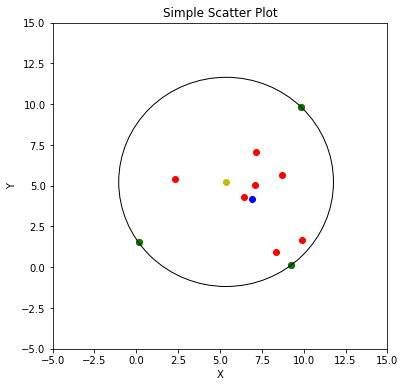

In [14]:
import matplotlib.pyplot as plt 
from matplotlib.patches import Circle
import random
import math 

# random.seed(1)

# fig = plt.figure(figsize=(6,6))

points = []
x=[random.random()*10 for _ in range(10)]
y=[random.random()*10 for _ in range(10)]
for i in range(len(x)):
    points.append((x[i], y[i]))
    
# plt.scatter(x,y,c="red")

x_0 = sum(x) / len(x)
y_0 = sum(y) / len(y)
point_0 = (x_0, y_0)

# plt.scatter(x,y,c="red")
# plt.scatter(x_0,y_0,c="b")

# triplet = initialTriplet(point_0, points)

# while True:
#     currentPoint, currentRadii = MinimaxTriplet(triplet)
#     furthestPoint, furthestDif = findFurthest(points, currentPoint)
#     if(abs(furthestDif-currentRadii)>0.0001):
# #         print("%")
#         triplet = FourPointFindTriplet(triplet, furthestPoint)
#     else:
#         print("current point:", currentPoint)
#         print("currentRadii:", currentRadii)
#         break
    
# for i in range(len(triplet)):
#     plt.scatter(triplet[i][0], triplet[i][1], c="g")
    
# plt.scatter(currentPoint[0], currentPoint[1], c="y")
# circle = Circle(currentPoint, radius=currentRadii, fill=False)
# plt.gca().add_patch(circle)


# plt.xlabel("X")
# plt.ylabel("Y")
# plt.xlim(-5,15)
# plt.ylim(-5,15)
# plt.title("Simple Scatter Plot")
# plt.show()

def SingleMinimaxLocation(points):
    bindingSet = []
    if(len(points)>=3):
        sumx = 0
        sumy = 0
        for i, j in points:
            sumx += i
            sumy += j
        x_0 = sumx / len(points)
        y_0 = sumy / len(points)
        point_0 = (x_0, y_0)
        print(points)
        print(point_0)
        triplet = initialTriplet(point_0, points)
        print('triplet:', triplet)
        while True:
            currentPoint, currentRadii = MinimaxTriplet(triplet)
            furthestPoint, furthestDif = findFurthest(points, currentPoint)
            if(abs(furthestDif-currentRadii)>0.0001):
        #         print("%")
                triplet = FourPointFindTriplet(triplet, furthestPoint)
            else:
                print("currenPoint:", currentPoint)
                print("currentRadii:", currentRadii)
                break
        bindingSet = triplet
        # ---------------- plot ----------------
        fig = plt.figure(figsize=(6,6))
        plt.scatter(x_0,y_0,c="b")
        for i, j in points:
            plt.scatter(i, j, c="red")
        for i in range(len(triplet)):
            plt.scatter(triplet[i][0], triplet[i][1], c="g")
        plt.scatter(currentPoint[0], currentPoint[1], c="y")
        circle = Circle(currentPoint, radius=currentRadii, fill=False)
        plt.gca().add_patch(circle)

        plt.xlabel("X")
        plt.ylabel("Y")
        plt.xlim(-5,15)
        plt.ylim(-5,15)
        plt.title("Simple Scatter Plot")
#         plt.show()
        return bindingSet, currentRadii
        
    else:
        if(len(points)==2):
            sumx = 0
            sumy = 0
            for i, j in points:
                sumx += i
                sumy += j
            x_0 = sumx / len(points)
            y_0 = sumy / len(points)
            point_0 = (x_0, y_0)
            currentPoint, currentRadii = twoPointMedian(points[0], points[1]) 
            
            for _ in range(len(points)):
                bindingSet.append(points[_])
            # ---------------- plot ----------------
            fig = plt.figure(figsize=(6,6))
            plt.scatter(x_0,y_0,c="b")
            for i, j in points:
                plt.scatter(i, j, c="red")
            plt.scatter(currentPoint[0], currentPoint[1], c="y")
            circle = Circle(currentPoint, radius=currentRadii, fill=False)
            plt.gca().add_patch(circle)

            plt.xlabel("X")
            plt.ylabel("Y")
            plt.xlim(-5,15)
            plt.ylim(-5,15)
            plt.title("Simple Scatter Plot")
#             plt.show()
            return bindingSet, currentRadii

        else: # len(points)==1
            currentPoint = points[0]
            currentRadii = 2 # ==========================
            bindingSet.append(points[0])
            # ---------------- plot ----------------
            fig = plt.figure(figsize=(6,6))
            plt.scatter(currentPoint[0], currentPoint[1], c="y")
            circle = Circle(currentPoint, radius=currentRadii, fill=False)
            plt.gca().add_patch(circle)
            plt.xlabel("X")
            plt.ylabel("Y")
            plt.xlim(-5,15)
            plt.ylim(-5,15)
            plt.title("Simple Scatter Plot")
#             plt.show()
            return bindingSet, currentRadii
        
SingleMinimaxLocation(points)

In [2]:
def calculateDistance2p(p1, p2):
    """給定兩點，回傳兩點距離"""
    dif = math.sqrt(math.pow(p1[0]-p2[0], 2) + math.pow(p1[1]-p2[1], 2))
    return dif

In [3]:
def findFurthest(points, p2):
    """給點集合和一點，回傳點集合中距離一點最遠的點"""
    Dif = []
    for i in range(len(points)):
        Dif.append(calculateDistance2p(points[i], p2))
    point = points[Dif.index(max(Dif))]
    maxDif = max(Dif)
    return point, maxDif

In [4]:
def twoPointMedian(p1, p2):
    """給定兩點，回傳其中點及半徑"""
    midx = (p1[0] + p2[0]) / 2
    midy = (p1[1] + p2[1]) / 2
    dif = math.sqrt(math.pow(p1[0]-p2[0], 2) + math.pow(p1[1]-p2[1], 2))
    radius = dif / 2
    return (midx, midy), radius

In [5]:
# def initialTriplet(x_0, y_0, x, y):
#     triplet = []
#     Dis = []
#     for i in range(len(x)):
#         dis = math.sqrt(math.pow(x_0 - x[i], 2) + math.pow(y_0 - y[i], 2))
#         Dis.append(dis)
#     SortedDis = sorted(Dis, reverse=True)
#     for i in range(3):
#         triplet.append((x[Dis.index(SortedDis[i])], y[Dis.index(SortedDis[i])]))
#     return triplet

In [6]:
def initialTriplet(point0, points):
    triplet = []
    Dis = []
    for i in range(len(x)):
        dis = math.sqrt(math.pow(point0[0] - points[i][0], 2) + math.pow(point0[1] - points[i][1], 2))
        Dis.append(dis)
    SortedDis = sorted(Dis, reverse=True)
    for i in range(3):
        triplet.append((points[Dis.index(SortedDis[i])][0], points[Dis.index(SortedDis[i])][1]))
    return triplet

In [7]:
def MinimaxTriplet(triplet):
    """找出 triplet 中的 minimax location"""
    for i in range(3):
        currentPoint, currentRadii = twoPointMedian(triplet[i%3], triplet[(i+1)%3])
        dif = math.sqrt(math.pow(currentPoint[0]-triplet[(i+2)%3][0] ,2) + math.pow(currentPoint[1]-triplet[(i+2)%3][1] ,2))
        if(dif<=currentRadii):
            return currentPoint, currentRadii
    return get_circle(triplet[0], triplet[1], triplet[2])

In [8]:
def get_circle(p1,p2,p3):
    '''三点求圆，返回圆心和半径'''
    x, y, z = p1[0]+p1[1]*1j, p2[0]+p2[1]*1j, p3[0]+p3[1]*1j
    w = z-x
    w /= y-x
    c = (x-y)*(w-abs(w)**2)/2j/w.imag-x 
    return (-c.real,-c.imag),abs(c+x)

In [9]:
def FourPointFindTriplet(triplet, p):
    if p in triplet:
        return triplet
    radiiList = []
    fourPoints = list.copy(triplet)
    fourPoints.append(p)
    for i in range(4):
        _ = list.copy(fourPoints)
        _.pop(i)
        currentPoint, currentRadii = MinimaxTriplet(_)
        radiiList.append(currentRadii)
#     fourPoints.pop(radiiList.index(max(radiiList)))
#     random.sample(fourPoints, k = 3)
    return random.sample(fourPoints, k = 3)